# pytorch workflow

Exploring an end-to-end workflow

In [ ]:
scheme = {1: "preparing and loading data",
          2: "build model",
          3: "Training",
          4: "making predications",
          5: "saving and loading",
          6: "putting all together"}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

## 1. preparing and loading data

Data can be anything in ML

* excel spreadsheet
* images of any kind
* videos
* Audio
* DNA

ML is a made of;
 - getting data to be represented numerically
 - build a model ot learn patterns based on the numerical representations.

 Lets create some *known data* using `linear regression formula`,

 we will use the LRF to make a straight line with known **parameters**

In [ ]:
## code linear regression
# create known parameters

weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) ## input(training and test data)
print(X.shape)
# y = mx + c
y = weight * X + bias ## output
X[:10], y[:10], X.shape, y.shape

torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]),
 torch.Size([50, 1]))

In [ ]:
len(X), len(y)

(50, 50)

## Splitting Data into training and test sets(Important in ML in general)


lets create a training and test set with our data

In [ ]:
## create a train : test  split
train_split = int(0.8 * len(X))  ## 80% of our input
print(train_split)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)



40


(40, 40, 10, 10)

### Visualise our test and training data

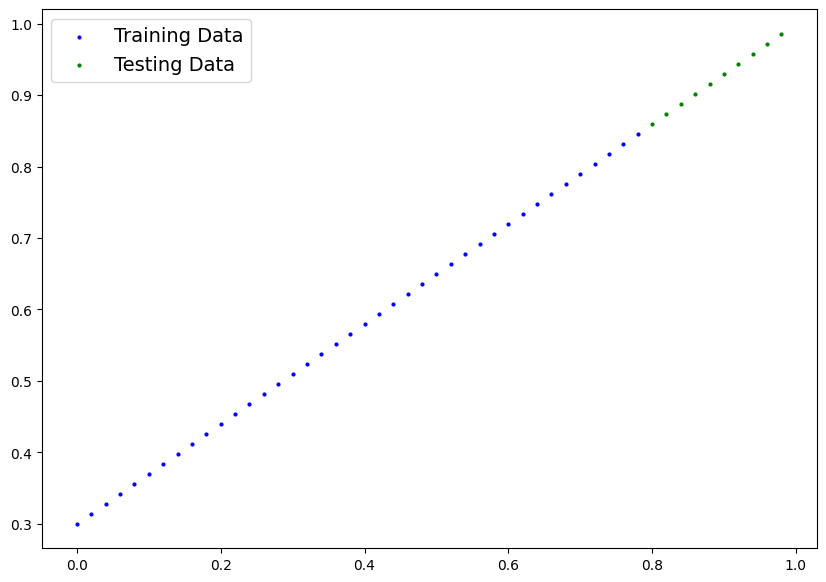

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  ## plot training Data in blue
  plt.scatter(train_data, train_labels, c ="b", s=4, label="Training Data")
   ## plot testing Data in green
  plt.scatter(test_data, test_labels, c ="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_labels, predictions, c="r", s=4, label="Predictions")


  plt.legend(prop={"size":14})

plot_predictions()

##2. Build the model
First pytorch model

what the model does;
 * start with random values
 * look at training Data and adjust the random vaues to better represent the ideal values(the weight and bias we used to create the data)

 ## How does it do so?

 1. gradient descent
 2. Back propagation

In [ ]:
# create linear regression model class
class LinearRegressionModel(nn.Module): ## everything pytorch inherits from this module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype=torch.float))


  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # this is the linear regression formula


### pyTorch model building essentials

* torch.nn - contains all buidlings for nn
* torch.nn.parameter - what parameters should our models try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all nn Modules, if inheritted from overwrite forward by writting a new method named foward
* torch.optim - this is where our optimisers live, they will help with gradient descent

 * `def foward(self, x: torch.tensor) -> torch.Tensor:`
      `return self.weights * X + self.bias`

In [ ]:
# Create a random seed

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinearRegressionModel()
check = list(model_0.parameters())
model_0.state_dict()
print(f"we want to go from {model_0.state_dict()} to {weight} and {bias} respectively")
X_test, y_test

we want to go from OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]) to 0.7 and 0.3 respectively


(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

## Making predictions with torch.inference_mode()
we can check the model's prediction power by seeing how well it predicts y_test based on x_test
when we pass data through our model we use the foward method to compute it

In [ ]:
# make predictions with model

with torch.inference_mode(): ## wtihout inferernce mode
  y_preds = model_0(X_test)
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

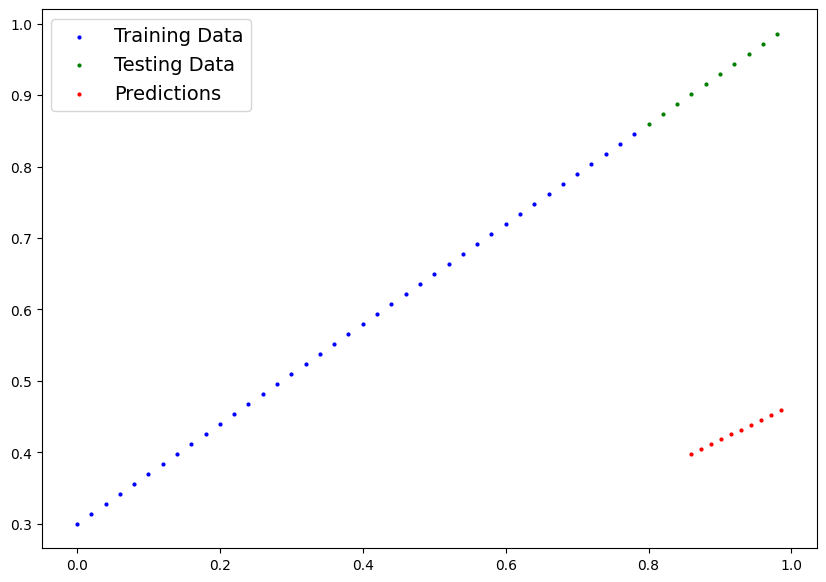

In [ ]:
plot_predictions(predictions=y_preds)

#3. Training The Model
seeing how abysmal the results of our prediction, we will now be training our model to move from some *unknown* parameters(these maybe random) to some *known* parameters
i.e. we will be going from a poor representation of data to a more accurate one using a loss function

* NOTE:Loss functions maybe called cost functions or criterion in different context.

## Things we need to **Train**

* ** Loss functions measure how wrong your model's predictions are to the ideal outputs, lower is better
* ** optimzer: Takes into account the loss of a model and adjusts the model's patrameters(e.g weight & bias) to imporve the loss function, in PyTorch we need;
the optimiser will take in a;
  * parameter - This is the parameters that the model has set itself
  * LR(learning rate) - This is the rate at which the optimiser changes the parameters with each change to better the predictions step by step
* Training Loop
* Testing loop


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# check models parameters(value that models sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup loss function
loss_fn = nn.L1Loss()
loss_fn
# setup optimiser
optimser = torch.optim.SGD(params=model_0.parameters(), lr=0.01) ## lr = learninig rate = possibly the most important
                                                            ## hyper parameter you can set commonly (0.1)

# building a training - testing loop:
0. Loop through the data
1. Forward pass (this involves data moving though our model I - O)
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradiants of each of the parameters of our model with respect to the loss(**Back propagation**)
5. optimiser step - user the optimiser to adjust our model parameters to try and improve

In [ ]:
epochs = 200 ## an Epoch is one loop through the data
epoch_count = []
loss_value = []
test_loss_value = []

## Training segment
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()
  # 1. forward pass
  y_pred = model_0(X_train) ## learn from training data to better test predictions

  # 2. Caluculate the loss
  loss = loss_fn(y_pred, y_train) # see how much we missed the predictions by, input, Target
  # print(f"loss:{loss}")
  # 3. optimiser zero grad
  optimser.zero_grad()

  # 4. perform backpropagation to evalute the loss for each model parameter
  loss.backward()

  # 5. step the optimiser perform GD
  optimser.step()

  # FLOLS

# TESTING MODE
  model_0.eval() ## turns off different settings not needed for evaluating/testing
  with torch.inference_mode():
    test_pred = model_0(X_test)

    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0: # display info every ten epoch
      epoch_count.append(epoch)
      loss_value.append(loss)
      test_loss_value.append(test_loss)
      print(f"Epoch: {epoch}, Loss: {loss}, test loss: {test_loss}")



print(f"{epoch_count}\n {loss_value}\n {test_loss_value}")
param = model_0.state_dict()


Epoch: 0, Loss: 0.31288138031959534, test loss: 0.48106518387794495
Epoch: 10, Loss: 0.1976713240146637, test loss: 0.3463551998138428
Epoch: 20, Loss: 0.08908725529909134, test loss: 0.21729660034179688
Epoch: 30, Loss: 0.053148526698350906, test loss: 0.14464017748832703
Epoch: 40, Loss: 0.04543796554207802, test loss: 0.11360953003168106
Epoch: 50, Loss: 0.04167863354086876, test loss: 0.09919948130846024
Epoch: 60, Loss: 0.03818932920694351, test loss: 0.08886633068323135
Epoch: 70, Loss: 0.03476089984178543, test loss: 0.0805937647819519
Epoch: 80, Loss: 0.03132382780313492, test loss: 0.07232122868299484
Epoch: 90, Loss: 0.02788739837706089, test loss: 0.06473556160926819
Epoch: 100, Loss: 0.024458957836031914, test loss: 0.05646304413676262
Epoch: 110, Loss: 0.021020207554101944, test loss: 0.04819049686193466
Epoch: 120, Loss: 0.01758546568453312, test loss: 0.04060482233762741
Epoch: 130, Loss: 0.014155393466353416, test loss: 0.03233227878808975
Epoch: 140, Loss: 0.0107165891

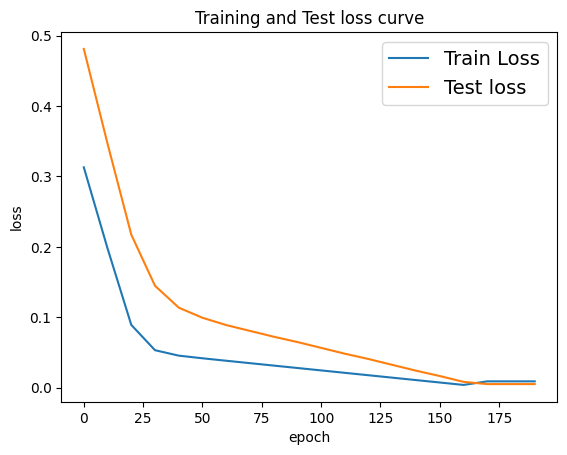

In [ ]:
import numpy as np
epoch_count, loss_value, test_loss_value
plt.plot(epoch_count, np.array(torch.tensor(loss_value).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_value, label="Test loss")
plt.title("Training and Test loss curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(prop={"size":14})

##  FLOLS (Training ♾️ Testing loop)
* F - **Forward** propagation
* L - Calculate **LOSS**
* O  - **Optimize** zero grad to zero out any accumulated inconsistencies
* L - **Loss** backward propagation
* S - **step** step step

0.7, 0.3, OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


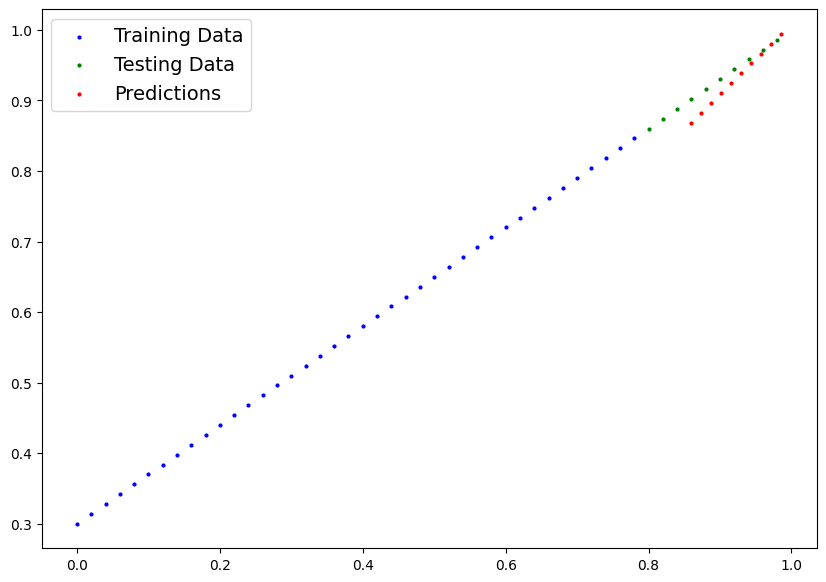

In [ ]:
print(f"{weight}, {bias}, {param}")
with torch.inference_mode():
  new_y_preds = model_0(X_test)
plot_predictions(predictions=new_y_preds)
## FLOLS

## saving models in PyTorch
There are two things involved in loading and saving a model;

* `torch.save()` - allows us to save a PyTorch object in the python pickle format
* `torch.model()` - allows us to load a model we saved in similar model
* `torch.nn.Module.load_state_dict()` - allows us to load a model's save dictionary


In [ ]:
from pathlib import Path

# 1. Create models directory
def model_saver(path_name, mode_name):
  pass

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH  = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)

# 3. Save mpdel state dictionary
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

models/01_pytorch_workflow_model.pth
Saving Model to: models/01_pytorch_workflow_model.pth


In [ ]:
# Load our model back in
untrained_model_instance = LinearRegressionModel()
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(f"Loaded model's trained state:{loaded_model.state_dict()}\n, Untrained Model: {untrained_model_instance.state_dict()}")

Loaded model's trained state:OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
, Untrained Model: OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])


In [ ]:
# make predictions using our loaded model

device = "cuda" if torch.cuda.is_available() else "cpu"
X_test = X_test.to(device)
loaded_model = loaded_model.to(device)
loaded_model.eval()
with torch.inference_mode():
 loaded_model_preds = loaded_model(X_test)
y_preds, loaded_model_preds

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]], device='cuda:0'))

In [ ]:
model_0.eval()
with torch.inference_mode():
  model_0 = model_0.to(device)
  new_y_preds = model_0(X_test)

new_y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
!nvidia-smi

cuda
Tue May 28 11:40:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0              28W /  70W |    121MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+--------------------

In [ ]:
# RECAP all of chapter 1
bias = 0.3
weight = 0.7
start, end, step = 0, 1, 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
# lrf
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train)

(40, 40)

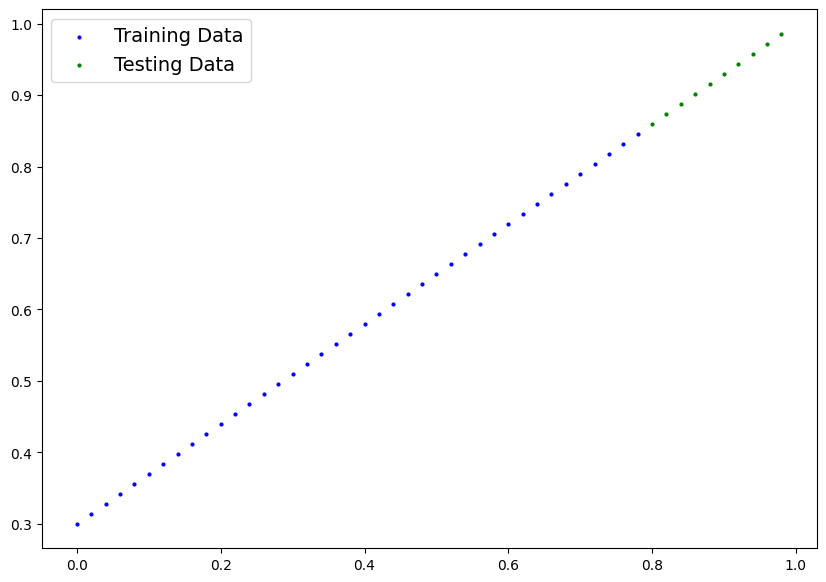

In [ ]:
## plot data

plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
## build model for predictions
class NewLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1, out_features=1) # v2 code to prevent having to create
    # bias and weight by ourselves as seen below

    # self.weight = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    # self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_v2 = NewLinearRegressionModel()
model_v2.state_dict()



OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
model_v2.to(device)
next(model_v2.parameters()).device

device(type='cuda', index=0)

In [ ]:
# training
# loss function
loss_fn = nn.L1Loss()

# put data on the gpu
X_test = X_test.to(device)
y_test = y_test.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)

# optimiser
optimiser = torch.optim.SGD(params=model_v2.parameters(), lr=0.01)

epochs = 200

for epoch in range(epochs):

  model_v2.train()

  # F
  y_preds = model_v2(X_train)
  #L
  loss = loss_fn(y_preds, y_train)
  #O
  optimiser.zero_grad()
  #L
  loss.backward()
  #S
  optimser.step()

  ## testing loop
  model_v2.eval()
  with torch.inference_mode():
    test_pred = model_v2(X_test)
    test_loss = loss_fn(y_preds, y_train)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, loss: {loss}, Test Loss: {test_loss}")

model_v2.state_dict()

Epoch: 0, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 10, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 20, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 30, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 40, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 50, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 60, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 70, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 80, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 90, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 100, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 110, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 120, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 130, loss: 0.5551779866218567, Test Loss: 0.5551779866218567
Epoch: 140, loss: 0.5551779866218567, Test Loss: 0.55517798

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
model_v2.eval()
torch.manual_seed(42)
with torch.inference_mode():
  y_predictions = model_v2(X_test)
y_predictions
# plot_predictions(predictions=y_preds.cpu())

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]], device='cuda:0')

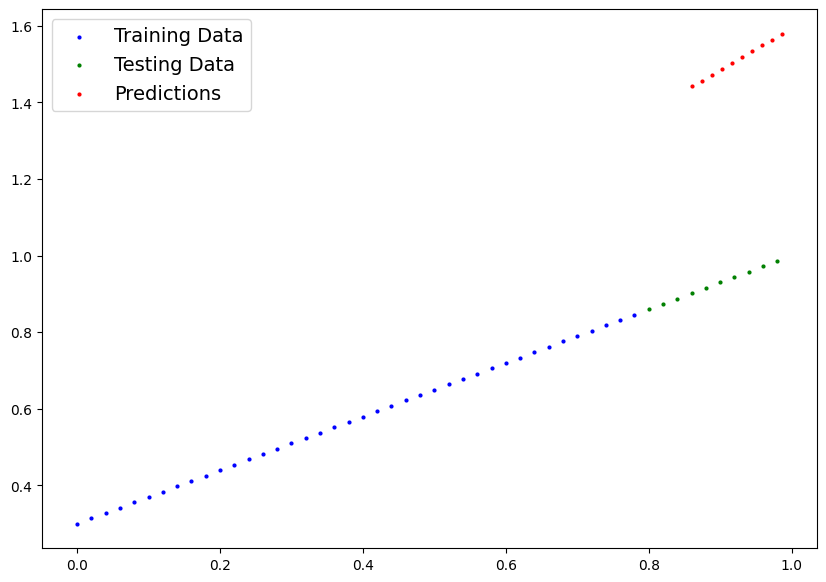

In [ ]:
plot_predictions(predictions=test_pred.cpu())